#Regex

In [ ]:
import re

chat1='codebasics: Hello, I am having an issue with my order # 412889912'

pattern = 'order[^\d]*(\d*)'
matches = re.findall(pattern, chat1)
matches

['412889912']

In [ ]:
text = '''
Follow our leader Elon musk on twitter here: https://twitter.com/elonmusk, more information 
on Tesla's products can be found at https://www.tesla.com/. Also here are leading influencers 
for tesla related news,
https://twitter.com/teslarati
https://twitter.com/dummy_tesla
https://twitter.com/dummy_2_tesla
'''
pattern = "twitter.com/([0-9a-zA-Z_]*)" # todo: type your regex here

re.findall(pattern, text)

['elonmusk', 'teslarati', 'dummy_tesla', 'dummy_2_tesla']

In [ ]:
text = '''
Concentration of Risk: Credit Risk
Financial instruments that potentially subject us to a concentration of credit risk consist of cash, cash equivalents, marketable securities,
restricted cash, accounts receivable, convertible note hedges, and interest rate swaps. Our cash balances are primarily invested in money market funds
or on deposit at high credit quality financial institutions in the U.S. These deposits are typically in excess of insured limits. As of September 30, 2021
and December 31, 2020, no entity represented 10% or more of our total accounts receivable balance. The risk of concentration for our convertible note
hedges and interest rate swaps is mitigated by transacting with several highly-rated multinational banks.
Concentration of Risk: Supply Risk
We are dependent on our suppliers, including single source suppliers, and the inability of these suppliers to deliver necessary components of our
products in a timely manner at prices, quality levels and volumes acceptable to us, or our inability to efficiently manage these components from these
suppliers, could have a material adverse effect on our business, prospects, financial condition and operating results.
'''
pattern ='Concentration of Risk: (.*)' # todo: type your regex here

re.findall(pattern, text)

['Credit Risk', 'Supply Risk']

In [ ]:
text = '''
Tesla's gross cost of operating lease vehicles in FY2021 Q1 was $4.85 billion.
BMW's gross cost of operating vehicles in FY2021 S1 was $8 billion.
'''

pattern = 'FY(\d{4} (?:Q[1-4]|S[1-4]))' # todo: type your regex here
matches = re.findall(pattern, text)
matches

['2021 Q1', '2021 S1']

#NLP 

## Spam Detection

Step1: Count Vectorization (number Vector) <br>
Step2: Naive Bias Classifier (Statistical Machine Learning)<br>
Step3: Detect spam and non spam 


TF-IDF convert text into vectors or set of 

##NLP Tasks
1. Fake Detection
2. Text similarities
3. Chatbot
4. Text/Information extraction
5. Machine Translation
6. Text summerization
7. Topic Modeling

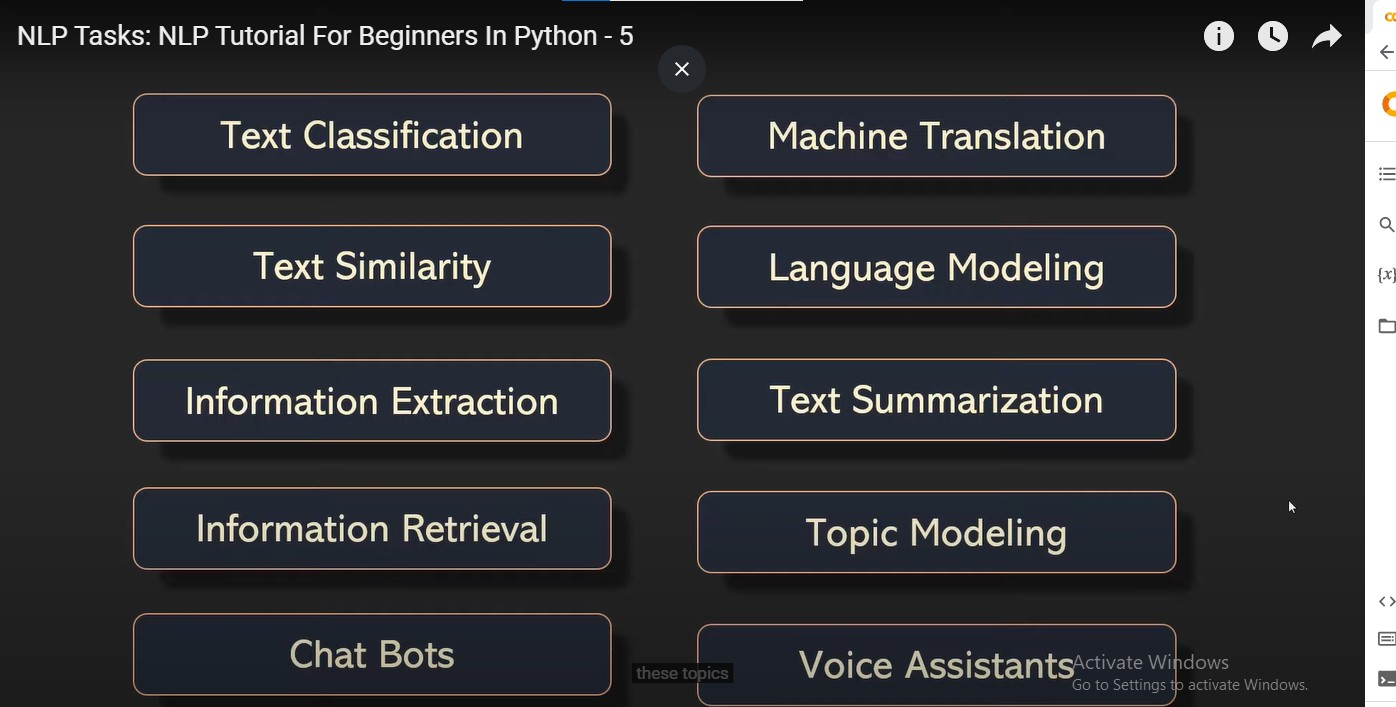

#NLP pipeline



###Stemming

dancing->dance

###Lematization
are->to be <br>
better->good

###Pipline

Data Acquisition-->Text Extraction-->Pre-processing(word tokenization,sentance segmentation,stemming and lematization)-->Feature Extraction(TF-IDF,One hot Encoding,Word Embedding)-->model Building->Evaluation(gridsearchcv)-->Deployment(aws,azure)-->Monitor & update

###Spacy
is based on object oriented
###NLTK
is string processing library


In [ ]:
import spacy

In [ ]:
nlp=spacy.load("en_core_web_sm")

In [ ]:
doc=nlp("Dr. Strange loves pav bhaji of mumabai. Hulk loves chaat of delhi")

#Sentence Tokenization
for sentence in doc.sents:
  for word in sentence:
    print(word)


Dr.
Strange
loves
pav
bhaji
of
mumabai
.
Hulk
loves
chaat
of
delhi


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import sent_tokenize

sent_tokenize("Dr. Strange loves pav bhaji of mumabai. Hulk loves chaat of delhi")

['Dr.', 'Strange loves pav bhaji of mumabai.', 'Hulk loves chaat of delhi']

In [ ]:
nlp=spacy.blank("en")
doc=nlp("Dr. Strange loves pav bhaji of mumabai. Hulk loves chaat of delhi")
#doc=nlp('''"Let's go to N.Y!"''')
for token in doc:
  print(token)


Dr.
Strange
loves
pav
bhaji
of
mumabai
.
Hulk
loves
chaat
of
delhi


In [ ]:
doc[-1]

delhi

In [ ]:
token0=doc[0]
token0

Dr.

In [ ]:
type(token0)

spacy.tokens.token.Token

In [ ]:
token0.like_num

False

In [ ]:
text='Dayton high school, 8th grade students information\n ==================================================\n \n Name\tbirth day   \temail\n -----\t------------\t------\n Virat   5 June, 1882    virat@kohli.com\n Maria\t12 April, 2001  maria@sharapova.com\n Serena  24 June, 1998   serena@williams.com \n Joe      1 May, 1997    joe@root.com\n \n \n \n'

In [ ]:
doc = nlp(text)
emails = []
for token in doc:
    if token.like_email:
        emails.append(token.text)
emails 

['virat@kohli.com',
 'maria@sharapova.com',
 'serena@williams.com',
 'joe@root.com']

In [ ]:
nlp = spacy.blank("hi")
doc = nlp("भैया जी! 5000 ₹ उधार थे वो वापस देदो")
for token in doc:
    print(token, token.is_currency)

भैया False
जी False
! False
5000 False
₹ True
उधार False
थे False
वो False
वापस False
देदो False


In [ ]:
from spacy.symbols import ORTH

nlp = spacy.blank("en")
doc = nlp("gimme double cheese extra large healthy pizza")
tokens = [token.text for token in doc]
tokens

['gimme', 'double', 'cheese', 'extra', 'large', 'healthy', 'pizza']

In [ ]:
nlp.tokenizer.add_special_case("gimme", [
    {ORTH: "gim"},
    {ORTH: "me"},
])
doc = nlp("gimme double cheese extra large healthy pizza")
tokens = [token.text for token in doc]
tokens

['gim', 'me', 'double', 'cheese', 'extra', 'large', 'healthy', 'pizza']

In [ ]:
nlp.pipeline

[]

In [ ]:
nlp.add_pipe('sentencizer')

In [ ]:
doc = nlp("Dr. Strange loves pav bhaji of mumbai. Hulk loves chat of delhi")
for sentence in doc.sents:
    print(sentence)


Dr. Strange loves pav bhaji of mumbai.
Hulk loves chat of delhi


In [ ]:
text='''
Look for data to help you address the question. Governments are good
sources because data from public research is often freely available. Good
places to start include http://www.data.gov/, and http://www.science.
gov/, and in the United Kingdom, http://data.gov.uk/.
Two of my favorite data sets are the General Social Survey at http://www3.norc.org/gss+website/, 
and the European Social Survey at http://www.europeansocialsurvey.org/.
'''

# TODO: Write code here
# Hint: token has an attribute that can be used to detect a url
doc=nlp(text)
urls = []
for token in doc:
    if token.like_url:
        urls.append(token.text)
urls 



['http://www.data.gov/',
 'http://www.science',
 'http://data.gov.uk/.',
 'http://www3.norc.org/gss+website/',
 'http://www.europeansocialsurvey.org/.']

In [ ]:
transactions = "Tony gave two $ to Peter, Bruce gave 500 € to Steve"

# TODO: Write code here
# Hint: Use token.i for the index of a token and token.is_currency for currency symbol detection

doc=nlp(transactions)
for token in doc:
  if doc[token.i+1].is_currency and token.like_num:
    print(token.text,doc[token.i+1].text)




two $
500 €


IndexError: ignored

##Spacy Language processing pipeline

In [ ]:
nlp=spacy.blank("en")

In [ ]:
doc=nlp("Dr. Strange loves pav bhaji of mumabai. Hulk loves chaat of delhi")

#Sentence Tokenization
for sentence in doc:
  print(sentence)

In [ ]:
nlp=spacy.load("en_core_web_sm")

In [ ]:
nlp.pipe_names

In [ ]:
nlp.pipeline

In [ ]:
doc=nlp("Dr. Strange loves pav bhaji of mumabai. Hulk loves chaat of delhi")

for token in doc:
  print(token,"|",token.pos_,"|",token.lemma_)

In [ ]:
doc=nlp("Tesla Inc is going to acquire twitter for $45 billion")

for ent in doc.ents:
  print(ent.text,"|",ent.label_,"|",spacy.explain(ent.label_))


In [ ]:
from spacy import displacy

displacy.render(doc,style="ent")

In [ ]:
source_nlp=spacy.load("en_core_web_sm")
print(source_nlp.pipe_names)
nlp=spacy.blank("en")
nlp.add_pipe("ner",source=source_nlp)
nlp.pipe_names


In [ ]:
doc=nlp("Tesla Inc is going to acquire twitter for $45 billion")

for ent in doc.ents:
  print(ent.text,"|",ent.label_,"|",spacy.explain(ent.label_))

In [ ]:
text = ''' Ravi and Raju are the best friends from school days.They wanted to go for a world tour and 
visit famous cities like Paris, London, Dubai, Rome etc and also they called their another friend Mohan to take part of this world tour.
They started their journey from Hyderabad and spent next 3 months travelling all the wonderful cities in the world and cherish a happy moments!
'''

# https://spacy.io/usage/linguistic-features
nlp=spacy.load("en_core_web_sm")
#creating the nlp object
doc = nlp(text)
pron=[]   
for token in doc:
  if token.pos_=='PROPN':
    pron.append(token)
    #print(token,"|",token.pos_)
pron    

In [ ]:
text = '''The Top 5 companies in USA are Tesla, Walmart, Amazon, Microsoft, Google and the top 5 companies in 
India are Infosys, Reliance, HDFC Bank, Hindustan Unilever and Bharti Airtel'''


doc = nlp(text)

#list for storing the company names
all_company_names = []

for ent in doc.ents:
  if ent.label_ == 'ORG':     #checking the whether token belongs to entity "ORG" [Organisation]
    all_company_names.append(ent)



#finally printing the results
print("Company Names: ", all_company_names)
print("Count: ", len(all_company_names))


In [ ]:
source_nlp=spacy.load("en_core_web_sm")
nlp=spacy.blank("en")
nlp.add_pipe("ner",source=source_nlp)
nlp.pipe_names


## Stemming and Lemmatization using NLTK

In [ ]:
#Stemming in NLTK
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()

In [ ]:
words = ["eating", "eats", "eat", "ate", "adjustable", "rafting", "ability", "meeting"]

for word in words:
  print(word,"|",stemmer.stem(word))

In [ ]:
import spacy

In [ ]:
nlp = spacy.load("en_core_web_sm")

doc = nlp("Mando talked for 3 hours although talking isn't his thing")
doc = nlp("eating eats eat ate adjustable rafting ability meeting better")
for token in doc:
    print(token, " | ", token.lemma_)

In [ ]:
nlp.pipe_names

In [ ]:
#customizing attributer rule
ar = nlp.get_pipe('attribute_ruler')

ar.add([[{"TEXT":"Bro"}],[{"TEXT":"Brah"}]],{"LEMMA":"Brother"})

doc = nlp("Bro, you wanna go? Brah, don't say no! I am exhausted")
for token in doc:
    print(token.text, "|", token.lemma_)

In [ ]:
doc[6].lemma_

In [ ]:
#let import necessary libraries and create the object

#for nltk
import nltk
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

#downloading all neccessary packages related to nltk
nltk.download('all')


#for spacy
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
lst_words = ['running', 'painting', 'walking', 'dressing', 'likely', 'children', 'whom', 'good', 'ate', 'fishing']
for word in lst_words:
  print(word,"|",stemmer.stem(word))

In [ ]:
lst_words = ['running', 'painting', 'walking', 'dressing', 'likely', 'children', 'whom', 'good', 'ate', 'fishing']
doc = nlp("running painting walking dressing likely children who good ate fishing")
for token in doc:
    print(token.text, "|", token.lemma_)

In [ ]:
#Exercise 
import nltk
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
#downloading all neccessary packages related to nltk
nltk.download('all')
#for spacy
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
text = """Latha is very multi talented girl.She is good at many skills like dancing, running, singing, playing.She also likes eating Pav Bhagi. she has a 
habit of fishing and swimming too.Besides all this, she is a wonderful at cooking too.
"""

In [ ]:
doc = nlp(text)
word_lst=[]
for token in doc:
  print(token,"|",stemmer.stem(token.text))
  word_lst.append(stemmer.stem(token.text))

my_string = ' '.join(word_lst)
print(my_string)

In [ ]:
doc=nlp(text)

word_lst=[]
for token in doc:
  print(token.text,"|",token.lemma_)
  word_lst.append(token.lemma_)

my_string = ' '.join(word_lst)
print(my_string)


In [ ]:
ar = nlp.get_pipe('attribute_ruler')

ar.add([[{"TEXT":"Bro"}],[{"TEXT":"Brah"}]],{"LEMMA":"Brother"})

doc = nlp("Bro, you wanna go? Brah, don't say no! I am exhausted")
for token in doc:
    print(token.text, "|", token.lemma_)

##POS Tagging

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
nlp.pipeline

In [ ]:
doc = nlp("Bro, you wanna go? Brah, don't say no! I am exhausted")

for token in doc:
  print(token,"|", token.pos_,spacy.explain(token.pos_),token.tag_,spacy.explain(token.tag_))

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

with open("text.txt","r") as f:
    news_text = f.read()
    
news_text[:500]

In [ ]:
doc = nlp(news_text)

noun_tok=[]
num_tok=[]
for token in doc:
  if token.pos_=='NOUN':
    noun_tok.append(token)
    #print(token,"|",token.pos_)
  if token.pos_=='NUM':
    num_tok.append(token)
    #print(token,"|",token.pos_)  

print(noun_tok)
print(num_tok)

In [ ]:
count = doc.count_by(spacy.attrs.POS)
count

In [ ]:
for k,v in count.items():
    print(doc.vocab[k].text, "|",v)

##NER-Name Entity Recongnition

In [ ]:
import spacy
nlp=spacy.load('en_core_web_sm')
nlp.pipe_names

In [ ]:
doc=nlp("Tesla Inc is going to acquire twitter for $45 billion")

for ent in doc.ents:
  print(ent.text,"|",ent.label_,spacy.explain(ent.label_))

In [ ]:
from spacy import displacy

displacy.render(doc,style="ent")

In [ ]:
nlp.pipe_labels["ner"]

In [ ]:
doc=nlp("Michael Bloomberg founded Bloomberg L.P in 1982")
for ent in doc.ents:
  print(ent.text,"|",ent.label_,spacy.explain(ent.label_))

In [ ]:
type(doc[2:6])

In [ ]:
from spacy.tokens import Span

s1=Span(doc,0,1,label="ORG")
s2=Span(doc,5,6,label="ORG")

doc.set_ents([s1,s2],default="unmodified")

In [ ]:
for ent in doc.ents:
  print(ent.text,"|",ent.label_)

In [ ]:
text = """Kiran want to know the famous foods in each state of India. So, he opened Google and search for this question. Google showed that
in Delhi it is Chaat, in Gujarat it is Dal Dhokli, in Tamilnadu it is Pongal, in Andhrapradesh it is Biryani, in Assam it is Papaya Khar,
in Bihar it is Litti Chowkha and so on for all other states"""

doc = nlp(text)

In [ ]:
for ent in doc.ents:
  if ent.label_=="GPE":
    print(ent.text,"|",ent.label_)
    

In [ ]:
text = """Sachin Tendulkar was born on 24 April 1973, Virat Kholi was born on 5 November 1988, Dhoni was born on 7 July 1981
and finally Ricky ponting was born on 19 December 1974."""

doc = nlp(text)

In [ ]:
for ent in doc.ents:
  if ent.label_=="DATE":
    print(ent.text,"|",ent.label_)

##Text representation



various approaches of converting text into vector

Label encoding->One hot encoding->Bag of words->TF-IDF->Word Embeddings

disadvnatge of label encoding

memory inefficient
Out of Vocabulary problem
No fixed length representation



In [ ]:
#Import necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

##Stop Words

In [ ]:
import spacy 
from spacy.lang.en.stop_words import STOP_WORDS
len(STOP_WORDS)

In [ ]:
nlp = spacy.load("en_core_web_sm")

doc = nlp("We just opened our wings, the flying part is coming soon")

for token in doc:
    if token.is_stop:
        print(token)

In [ ]:
def preprocess(text):
    doc = nlp(text)
    
    no_stop_words = [token.text for token in doc if not token.is_stop]
    return " ".join(no_stop_words)

In [ ]:
preprocess("Musk wants time to prepare for a trial over his")

In [ ]:
preprocess("The other is not other but your divine brother")

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
text = '''
Thor: Love and Thunder is a 2022 American superhero film based on Marvel Comics featuring the character Thor, produced by Marvel Studios and 
distributed by Walt Disney Studios Motion Pictures. It is the sequel to Thor: Ragnarok (2017) and the 29th film in the Marvel Cinematic Universe (MCU).
The film is directed by Taika Waititi, who co-wrote the script with Jennifer Kaytin Robinson, and stars Chris Hemsworth as Thor alongside Christian Bale, Tessa Thompson,
Jaimie Alexander, Waititi, Russell Crowe, and Natalie Portman. In the film, Thor attempts to find inner peace, but must return to action and recruit Valkyrie (Thompson),
Korg (Waititi), and Jane Foster (Portman)—who is now the Mighty Thor—to stop Gorr the God Butcher (Bale) from eliminating all gods.
'''

In [ ]:
doc=nlp(text)

tk_lst=[]
token_lst=[]
for token in doc:
  tk_lst.append(token)
  if token.is_stop:
    token_lst.append(token)

print(token_lst)
print(len(token_lst))

print((len(token_lst)*100)/len(tk_lst))



  

In [ ]:
#use this pre-processing function to pass the text and to remove all the stop words and finally get the cleaned form
def preprocess(text):
    doc = nlp(text)
    no_stop_words = [token.text for token in doc if not token.is_stop]
    return " ".join(no_stop_words)       


#Step1: remove the stopword 'not' in spacy
nlp.vocab['not'].is_stop = False


#step2: send the two texts given above into the pre-process function and store the transformed texts
positive_text = preprocess('this is a good movie')
negative_text = preprocess('this is not a good movie')


#step3: finally print those 2 transformed texts
print(f"Text1: {positive_text}")
print(f"Text2: {negative_text}")

In [ ]:
text = ''' The India men's national cricket team, also known as Team India or the Men in Blue, represents India in men's international cricket.
It is governed by the Board of Control for Cricket in India (BCCI), and is a Full Member of the International Cricket Council (ICC) with Test,
One Day International (ODI) and Twenty20 International (T20I) status. Cricket was introduced to India by British sailors in the 18th century, and the 
first cricket club was established in 1792. India's national cricket team played its first Test match on 25 June 1932 at Lord's, becoming the sixth team to be
granted test cricket status.
'''


#step1: Create the object 'doc' for the given text using nlp()
doc = nlp(text)


#step2: remove all the stop words and punctuations and store all the remaining tokens in a new list
remaining_tokens = []
for token in doc:
  if token.is_stop or token.is_punct:    #check whether a given token is stop word or punctuations
    continue
  remaining_tokens.append(token.text)


#step3: create a new dictionary and get the frequency of words by iterating through the list which contains stored tokens  
frequency_tokens = {}
for token in remaining_tokens:
  if token != '\n' and token != ' ':      #As spacy considers new line and empty spaces as seperate token, it's better to ignore them
    if token not in frequency_tokens:     #if a particular token occurs for the first time, we initialise it to 1
      frequency_tokens[token] = 1
    else:
      frequency_tokens[token] += 1        #if a partcular token is already present, then increment by 1 based on value already presented


#step4: get the maximum frequency word
max_freq_word = max(frequency_tokens.keys(), key=(lambda key: frequency_tokens[key]))


#step5: finally print the result
print(f"Maximum frequency word: {max_freq_word}") 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

v=CountVectorizer(ngram_range=(1,3))
v.fit(["Thor Hthodawala is looking for a job"])
v.vocabulary_


In [ ]:
corpus = [
    "Thor ate pizza",
    "Loki is tall",
    "Loki is eating pizza"
]

In [ ]:
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [ ]:
corpus_processed = [
    preprocess(text) for text in corpus
]
corpus_processed

In [ ]:
v = CountVectorizer(ngram_range=(1,2))
v.fit(corpus_processed)
v.vocabulary_

In [ ]:
v.transform(["Thor eat pizza"]).toarray()

In [ ]:
v.transform(["Hulk eat pizza"]).toarray()

###Notes

without preprocessing of dataset bag of words algorithm perform better results than bi_gram, tri_gram or n_gram.

after preprocessing(applying stemming and lemmatization) n_gram algorithm perform better results<br>

imbalance dataset handling
1. Under sampling
2. Over sampling
3. SMOTE
4. Ensemble


https://github.com/codebasics/nlp-tutorials/blob/main/11_bag_of_n_grams/bag_of_n_grams_exercise.ipynb

In [ ]:
import pandas as pd

In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model

In [ ]:
# Loading The Data
df_true = pd.read_csv("/content/Fake.csv")
df_fake = pd.read_csv("/content/True.csv")

In [ ]:
df_true.head()

In [ ]:
df_fake.head()

In [ ]:
df_true['isfake'] = 1
df_true.head()

In [ ]:
df_fake['isfake'] = 0
df_fake.head()

In [ ]:
df = pd.concat([df_true, df_fake]).reset_index(drop = True)
df

In [ ]:
#Checking if dataset is class-imbalanced or not
df['isfake'].value_counts

In [ ]:
df.drop(columns = ['date','subject','title'], inplace = True)


In [ ]:
df['label']=df['isfake']

In [ ]:
df

In [ ]:
df.drop(columns = ['isfake'], inplace = True)

In [ ]:
df['label'].value_counts()

In [ ]:
df

In [ ]:
from sklearn.model_selection import train_test_split


#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
X_train, X_test, y_train, y_test = train_test_split(
    df.text, 
    df.label, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.label
)

In [ ]:
#print the shapes of X_train and X_test

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from  sklearn.neighbors import KNeighborsClassifier

#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_trigrams', CountVectorizer(ngram_range = (1, 3))),                   #using the ngram_range parameter 
     ('KNN', (KNeighborsClassifier(n_neighbors=10, metric = 'euclidean')))           #using the KNN classifier with 10 neighbors and euclidean distance      
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

In [ ]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_trigrams', CountVectorizer(ngram_range = (1, 3))),          #using the ngram_range parameter 
     ('KNN', (KNeighborsClassifier(n_neighbors = 10, metric = 'cosine')))    #using the KNN classifier with 10 neighbors and cosine distance       
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.ensemble import RandomForestClassifier


#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_n_grams', CountVectorizer(ngram_range = (3, 3))),                       #using the ngram_range parameter 
    ('random_forest', (RandomForestClassifier()))         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.naive_bayes import MultinomialNB


#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_trigrams', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB(alpha = 0.75))         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

In [ ]:
#use this utility function to get the preprocessed text data

import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [ ]:
# create a new column "preprocessed_txt" and use the utility function above to get the clean data
# this will take some time, please be patient
df['preprocessed_txt'] = df['Text'].apply(preprocess) 

In [ ]:
df.head()

In [ ]:
#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
#Note: Make sure to use only the "preprocessed_txt" column for splitting

X_train, X_test, y_train, y_test = train_test_split(
    df.preprocessed_txt, 
    df.label_num,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.label_num
)

In [ ]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_n_grams', CountVectorizer(ngram_range = (3, 3))),                       #using the ngram_range parameter 
    ('random_forest', (RandomForestClassifier()))         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

In [ ]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_n_grams', CountVectorizer(ngram_range = (1, 3))),                       #using the ngram_range parameter 
    ('random_forest', (RandomForestClassifier()))         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

In [ ]:
#finally print the confusion matrix for the best model

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [ ]:
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_lg") 

In [ ]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gensim.downloader as api
wv=api.load("word2vec-google-news-300")

In [ ]:
wv=api.load("word2vec-google-news-300")

In [ ]:
!pip install python-Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 22.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd

df = pd.read_csv("/content/Cleaned_Indian_Food_Dataset.csv")
print(df.shape)
df.head(3)

(5938, 9)


,TranslatedRecipeName,TranslatedIngredients,TotalTimeInMins,Cuisine,TranslatedInstructions,URL,Cleaned-Ingredients,image-url,Ingredient-count
0,Masala Karela Recipe,"1 tablespoon Red Chilli powder,3 tablespoon Gr...",45,Indian,"To begin making the Masala Karela Recipe,de-se...",https://www.archanaskitchen.com/masala-karela-...,"salt,amchur (dry mango powder),karela (bitter ...",https://www.archanaskitchen.com/images/archana...,10
1,Spicy Tomato Rice (Recipe),"2 teaspoon cashew - or peanuts, 1/2 Teaspoon ...",15,South Indian Recipes,"To make tomato puliogere, first cut the tomato...",https://www.archanaskitchen.com/spicy-tomato-r...,"tomato,salt,chickpea lentils,green chilli,rice...",https://www.archanaskitchen.com/images/archana...,12
2,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,"1 Onion - sliced,1 teaspoon White Urad Dal (Sp...",50,South Indian Recipes,"To begin making the Ragi Vermicelli Recipe, fi...",https://www.archanaskitchen.com/ragi-vermicell...,"salt,rice vermicelli noodles (thin),asafoetida...",https://www.archanaskitchen.com/images/archana...,12


In [ ]:
df.TranslatedInstructions[0]

'To begin making the Masala Karela Recipe,de-seed the karela and slice.\nDo not remove the skin as the skin has all the nutrients.\nAdd the karela to the pressure cooker with 3 tablespoon of water, salt and turmeric powder and pressure cook for three whistles.\nRelease the pressure immediately and open the lids.\nKeep aside.Heat oil in a heavy bottomed pan or a kadhai.\nAdd cumin seeds and let it sizzle.Once the cumin seeds have sizzled, add onions and saute them till it turns golden brown in color.Add the karela, red chilli powder, amchur powder, coriander powder and besan.\nStir to combine the masalas into the karela.Drizzle a little extra oil on the top and mix again.\nCover the pan and simmer Masala Karela stirring occasionally until everything comes together well.\nTurn off the heat.Transfer Masala Karela into a serving bowl and serve.Serve Masala Karela along with Panchmel Dal and Phulka for a weekday meal with your family.\n'

In [ ]:
import re

text = 'To begin making the Masala Karela Recipe,de-seed the karela and slice.\nDo not remove the skin as the skin has all the nutrients.\nAdd the karela to the pressure cooker with 3 tablespoon of water, salt and turmeric powder and pressure cook for three whistles.\nRelease the pressure immediately and open the lids.\nKeep aside.Heat oil in a heavy bottomed pan or a kadhai.\nAdd cumin seeds and let it sizzle.Once the cumin seeds have sizzled, add onions and saute them till it turns golden brown in color.Add the karela, red chilli powder, amchur powder, coriander powder and besan.\nStir to combine the masalas into the karela.Drizzle a little extra oil on the top and mix again.\nCover the pan and simmer Masala Karela stirring occasionally until everything comes together well.\nTurn off the heat.Transfer Masala Karela into a serving bowl and serve.Serve Masala Karela along with Panchmel Dal and Phulka for a weekday meal with your family.\n'

re.sub(r"[^\w\s]", " ", text, flags=re.MULTILINE)

'To begin making the Masala Karela Recipe de seed the karela and slice \nDo not remove the skin as the skin has all the nutrients \nAdd the karela to the pressure cooker with 3 tablespoon of water  salt and turmeric powder and pressure cook for three whistles \nRelease the pressure immediately and open the lids \nKeep aside Heat oil in a heavy bottomed pan or a kadhai \nAdd cumin seeds and let it sizzle Once the cumin seeds have sizzled  add onions and saute them till it turns golden brown in color Add the karela  red chilli powder  amchur powder  coriander powder and besan \nStir to combine the masalas into the karela Drizzle a little extra oil on the top and mix again \nCover the pan and simmer Masala Karela stirring occasionally until everything comes together well \nTurn off the heat Transfer Masala Karela into a serving bowl and serve Serve Masala Karela along with Panchmel Dal and Phulka for a weekday meal with your family \n'

In [ ]:
def preprocess(text):
    text = re.sub(r'[^\w\s\']',' ', text)
    text = re.sub(r'[ \n]+', ' ', text)
    return text.strip().lower() 

In [ ]:
text = 'To begin making the Masala Karela Recipe,de-seed the karela and slice.\nDo not remove the skin as the skin has all the nutrients.\nAdd the karela to the pressure cooker with 3 tablespoon of water, salt and turmeric powder and pressure cook for three whistles.\nRelease the pressure immediately and open the lids.\nKeep aside.Heat oil in a heavy bottomed pan or a kadhai.\nAdd cumin seeds and let it sizzle.Once the cumin seeds have sizzled, add onions and saute them till it turns golden brown in color.Add the karela, red chilli powder, amchur powder, coriander powder and besan.\nStir to combine the masalas into the karela.Drizzle a little extra oil on the top and mix again.\nCover the pan and simmer Masala Karela stirring occasionally until everything comes together well.\nTurn off the heat.Transfer Masala Karela into a serving bowl and serve.Serve Masala Karela along with Panchmel Dal and Phulka for a weekday meal with your family.\n'

preprocess(text)

'to begin making the masala karela recipe de seed the karela and slice do not remove the skin as the skin has all the nutrients add the karela to the pressure cooker with 3 tablespoon of water salt and turmeric powder and pressure cook for three whistles release the pressure immediately and open the lids keep aside heat oil in a heavy bottomed pan or a kadhai add cumin seeds and let it sizzle once the cumin seeds have sizzled add onions and saute them till it turns golden brown in color add the karela red chilli powder amchur powder coriander powder and besan stir to combine the masalas into the karela drizzle a little extra oil on the top and mix again cover the pan and simmer masala karela stirring occasionally until everything comes together well turn off the heat transfer masala karela into a serving bowl and serve serve masala karela along with panchmel dal and phulka for a weekday meal with your family'

In [ ]:
df.TranslatedInstructions = df.TranslatedInstructions.map(preprocess)

In [ ]:
df.TranslatedInstructions[0]

'to begin making the masala karela recipe de seed the karela and slice do not remove the skin as the skin has all the nutrients add the karela to the pressure cooker with 3 tablespoon of water salt and turmeric powder and pressure cook for three whistles release the pressure immediately and open the lids keep aside heat oil in a heavy bottomed pan or a kadhai add cumin seeds and let it sizzle once the cumin seeds have sizzled add onions and saute them till it turns golden brown in color add the karela red chilli powder amchur powder coriander powder and besan stir to combine the masalas into the karela drizzle a little extra oil on the top and mix again cover the pan and simmer masala karela stirring occasionally until everything comes together well turn off the heat transfer masala karela into a serving bowl and serve serve masala karela along with panchmel dal and phulka for a weekday meal with your family'

In [ ]:
df.to_csv("food_receipes.txt", columns=["TranslatedInstructions"], header=None, index=False)

In [ ]:
!pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 KB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.10.4-py3-none-any.whl (222 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp39-cp39-linux_x86_64.whl size=4395545 sha256=fa060fec19f2c0cfa6143680ae69fdc84a68ba6a3d07b71c3759d4973e4c70c0
  Stored in directory: /root/.cache/pip/wheels/64/57/bc/1741406019061d5664914b070bd3e71f6244648732bc96109e
Successfully built fasttext


In [ ]:
import fasttext

model = fasttext.train_unsupervised("food_receipes.txt")

In [ ]:
model.get_nearest_neighbors("paneer")

[(0.7046746611595154, 'tikka'),
 (0.6630706191062927, 'tikkas'),
 (0.6622522473335266, 'tandoori'),
 (0.6518504619598389, 'bhurji'),
 (0.6466901302337646, 'reshmi'),
 (0.6369193196296692, 'nawabi'),
 (0.6190375685691833, 'makhanwala'),
 (0.6179590821266174, 'hariyali'),
 (0.6143130660057068, 'makhani'),
 (0.5987952351570129, 'malai')]

In [ ]:
model.get_nearest_neighbors("chutney")

[(0.9275704622268677, 'chutneys'),
 (0.7463748455047607, 'dhaniya'),
 (0.7132056951522827, 'imli'),
 (0.7042087316513062, 'khajur'),
 (0.6639349460601807, 'kanchipuram'),
 (0.6590506434440613, 'pudina'),
 (0.6549491286277771, 'gothsu'),
 (0.6544407606124878, 'chammanthi'),
 (0.6525646448135376, 'south'),
 (0.6511055827140808, 'madurai')]

In [ ]:
model.get_nearest_neighbors("halwa")

[(0.7467402815818787, 'khoya'),
 (0.7186369299888611, 'burfi'),
 (0.7104381322860718, 'rabri'),
 (0.6857462525367737, 'mawa'),
 (0.6752265095710754, 'badam'),
 (0.672613799571991, 'sheera'),
 (0.6673717498779297, 'kheer'),
 (0.6628114581108093, 'mohan'),
 (0.6588674187660217, 'basundi'),
 (0.6500763297080994, 'doodh')]

In [ ]:
model.get_nearest_neighbors("dosa")

[(0.8473756909370422, 'dosai'),
 (0.8177902698516846, 'dosas'),
 (0.7941131591796875, "dosa's"),
 (0.7563254237174988, 'uthappam'),
 (0.7445687055587769, 'uttapam'),
 (0.7228896021842957, 'kanchipuram'),
 (0.7157869338989258, 'dose'),
 (0.7090448141098022, 'neer'),
 (0.7085314393043518, 'pesarattu'),
 (0.7060192227363586, 'chembaruthi')]

### Text Classification using Fasttext


In [ ]:
import pandas as pd

df= pd.read_csv("/content/ecommerceDataset.csv", names=["category", "description"], header=None)
print(df.shape)
df.head(3)

(50425, 2)


,category,description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...


In [ ]:
df.dropna(inplace=True)
df.shape

(50424, 2)

In [ ]:
df.category.unique()

array(['Household', 'Books', 'Clothing & Accessories', 'Electronics'],
      dtype=object)

In [ ]:
df.category.replace("Clothing & Accessories", "Clothing_Accessories", inplace=True)

In [ ]:
df.category.unique()

array(['Household', 'Books', 'Clothing_Accessories', 'Electronics'],
      dtype=object)

In [ ]:
df['category'] = '__label__' + df['category'].astype(str)
df.head(5)


,category,description
0,__label__Household,Paper Plane Design Framed Wall Hanging Motivat...
1,__label__Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,__label__Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,__label__Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,__label__Household,Incredible Gifts India Wooden Happy Birthday U...


In [ ]:
df['category_description'] = df['category'] + ' ' + df['description']
df.head(3)

,category,description,category_description
0,__label__Household,Paper Plane Design Framed Wall Hanging Motivat...,__label__Household Paper Plane Design Framed W...
1,__label__Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",__label__Household SAF 'Floral' Framed Paintin...
2,__label__Household,SAF 'UV Textured Modern Art Print Framed' Pain...,__label__Household SAF 'UV Textured Modern Art...


In [ ]:
import re

text = "  VIKI's | Bookcase/Bookshelf (3-Shelf/Shelve, White) | ? . hi"
text = re.sub(r'[^\w\s\']',' ', text)
text = re.sub(' +', ' ', text)
text.strip().lower()

"viki's bookcase bookshelf 3 shelf shelve white hi"

In [ ]:
def preprocess(text):
    text = re.sub(r'[^\w\s\']',' ', text)
    text = re.sub(' +', ' ', text)
    return text.strip().lower()

In [ ]:
df['category_description'] = df['category_description'].map(preprocess)
df.head()


,category,description,category_description
0,__label__Household,Paper Plane Design Framed Wall Hanging Motivat...,__label__household paper plane design framed w...
1,__label__Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",__label__household saf 'floral' framed paintin...
2,__label__Household,SAF 'UV Textured Modern Art Print Framed' Pain...,__label__household saf 'uv textured modern art...
3,__label__Household,"SAF Flower Print Framed Painting (Synthetic, 1...",__label__household saf flower print framed pai...
4,__label__Household,Incredible Gifts India Wooden Happy Birthday U...,__label__household incredible gifts india wood...


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [ ]:
train.shape, test.shape

((40339, 3), (10085, 3))

In [ ]:
train.to_csv("ecommerce.train", columns=["category_description"], index=False, header=False)
test.to_csv("ecommerce.test", columns=["category_description"], index=False, header=False)

In [ ]:
import fasttext

model = fasttext.train_supervised(input="ecommerce.train")
model.test("ecommerce.test")

(10083, 0.9698502429832391, 0.9698502429832391)

In [ ]:
import fasttext

model = fasttext.train_supervised(input="ecommerce.train")
model.test("ecommerce.test")

(10083, 0.9698502429832391, 0.9698502429832391)

In [ ]:
model.predict("ockey men's cotton t shirt fabric details 80 cotton 20 polyester super combed cotton rich fabric")

(('__label__clothing_accessories',), array([1.00001001]))

In [ ]:
model.predict("think and grow rich deluxe edition")

(('__label__books',), array([1.00000918]))

In [ ]:
model.get_nearest_neighbors("painting")

[(0.9987960457801819, 'valet'),
 (0.9987875819206238, '\xa0quality'),
 (0.9987875819206238, '\xa0\xa0easy'),
 (0.9987857937812805, 'granule'),
 (0.9987818002700806, 'bch20dbb21'),
 (0.9987818002700806, '217897'),
 (0.9987817406654358, 'chefdelite'),
 (0.998775839805603, "'magnificent"),
 (0.998774528503418, 'hl7576'),
 (0.9987744092941284, 'saysha')]

In [ ]:
model.get_nearest_neighbors("sony")

[(0.9990699291229248, 'trojans'),
 (0.9990532994270325, 'armored'),
 (0.9990532398223877, 'ima_adpcm'),
 (0.9990532398223877, 'attentively'),
 (0.9990511536598206, 'posthumous'),
 (0.999049723148346, '6000'),
 (0.9990447163581848, 'asses'),
 (0.9990418553352356, 'uninterruptedly'),
 (0.9990308880805969, 'reread'),
 (0.999017059803009, '1536')]

In [ ]:
model.get_nearest_neighbors("banglore")

[(0.0, 'to'),
 (0.0, 'and'),
 (0.0, 'a'),
 (0.0, 'with'),
 (0.0, 'for'),
 (0.0, 'is'),
 (0.0, '</s>'),
 (0.0, 'dippernote'),
 (0.0, '98inchpackage'),
 (0.0, '30x0')]